In [2]:
from cymetric import convenient_interface as com
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [3]:
import cymetric as cym
db = cym.dbopen('cyclus.sqlite')
ev = cym.Evaluator(db=db, write=False)

In [4]:
FBR_dr_trans = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'])
FBR_dr_trans_LEU = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'], commod_list=['FBR_LEU_N'] )
FBR_dr_trans_N_1 = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'], commod_list=['FBR_MOX_N_1'] )
FBR_dr_trans_N_2 = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'], commod_list=['FBR_MOX_N_2'] )
FBR_dr_trans_N_3 = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'], commod_list=['FBR_MOX_N_3'] )
FBR_dr_trans_N_4 = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'], commod_list=['FBR_MOX_N_4'] )
FBR_dr_trans_N = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'], commod_list=['FBR_MOX_N'] )

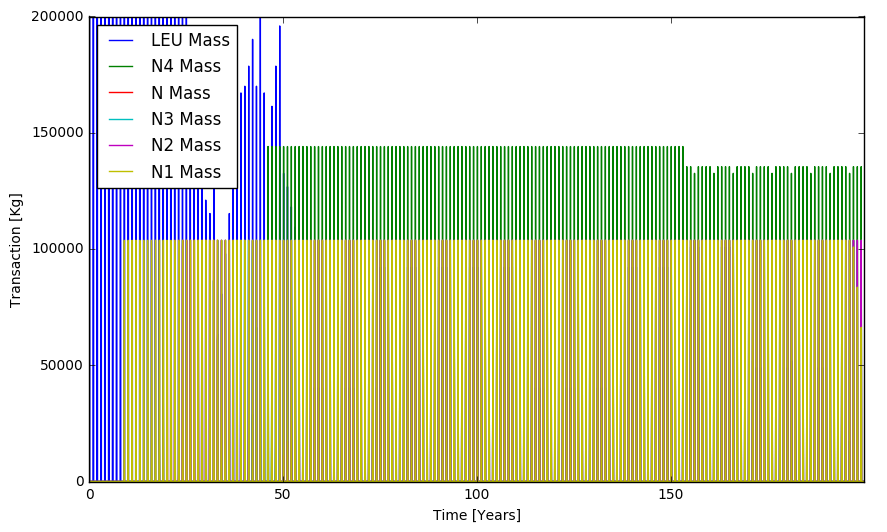

In [16]:
#FBR_dr_trans_dat = pd.DataFrame({'Time': FBR_dr_trans.Time/12., 'Total Mass': FBR_dr_trans.Mass})
FBR_dr_trans_LEU_dat = pd.DataFrame({'Time': FBR_dr_trans_LEU.Time/12., 'LEU Mass': FBR_dr_trans_LEU.Mass})
FBR_dr_trans_N1_dat = pd.DataFrame({'Time': FBR_dr_trans_N_1.Time/12., 'N1 Mass': FBR_dr_trans_N_1.Mass})
FBR_dr_trans_N2_dat = pd.DataFrame({'Time': FBR_dr_trans_N_2.Time/12., 'N2 Mass': FBR_dr_trans_N_2.Mass})
FBR_dr_trans_N3_dat = pd.DataFrame({'Time': FBR_dr_trans_N_3.Time/12., 'N3 Mass': FBR_dr_trans_N_3.Mass})
FBR_dr_trans_N4_dat = pd.DataFrame({'Time': FBR_dr_trans_N_4.Time/12., 'N4 Mass': FBR_dr_trans_N_4.Mass})
FBR_dr_trans_N_dat = pd.DataFrame({'Time': FBR_dr_trans_N.Time/12., 'N Mass': FBR_dr_trans_N.Mass})


#e1x = FBR_dr_trans_dat.plot(x='Time', y='Total Mass', figsize=(10, 6))
e1x = FBR_dr_trans_LEU_dat.plot(x='Time', y='LEU Mass', figsize=(10, 6))

#FBR_dr_trans_LEU_dat.plot(x='Time', y='LEU Mass', ax=e1x)
FBR_dr_trans_N1_dat.plot(x='Time', y='N1 Mass', ax=e1x)
FBR_dr_trans_N2_dat.plot(x='Time', y='N2 Mass', ax=e1x)
FBR_dr_trans_N3_dat.plot(x='Time', y='N3 Mass', ax=e1x)
FBR_dr_trans_N4_dat.plot(x='Time', y='N4 Mass', ax=e1x)
FBR_dr_trans_N_dat.plot(x='Time', y='N Mass', ax=e1x)



plt.ylim([0,200000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)


In [6]:
sep_inv_N_0 = com.get_inventory_timeseries(ev, fac_list=['SEP_0'])
sep_inv_N_1 = com.get_inventory_timeseries(ev, fac_list=['SEP_1'])
sep_inv_N_2 = com.get_inventory_timeseries(ev, fac_list=['SEP_2'])
sep_inv_N_3 = com.get_inventory_timeseries(ev, fac_list=['SEP_3'])
sep_inv_N_4 = com.get_inventory_timeseries(ev, fac_list=['SEP_4'])
sep_inv_N = com.get_inventory_timeseries(ev, fac_list=['SEP'])
blk_inv = com.get_inventory_timeseries(ev, fac_list=['Storage_blk_tru'])

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/convenient_interface.py:330: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


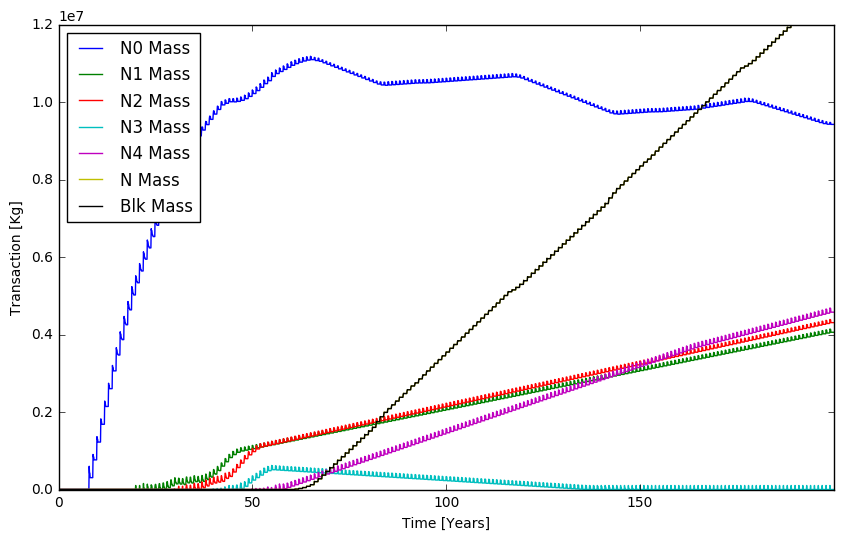

In [12]:
sep_inv_N0_dat = pd.DataFrame({'Time': sep_inv_N_0.Time/12., 'N0 Mass': sep_inv_N_0.Quantity})
sep_inv_N1_dat = pd.DataFrame({'Time': sep_inv_N_1.Time/12., 'N1 Mass': sep_inv_N_1.Quantity})
sep_inv_N2_dat = pd.DataFrame({'Time': sep_inv_N_2.Time/12., 'N2 Mass': sep_inv_N_2.Quantity})
sep_inv_N3_dat = pd.DataFrame({'Time': sep_inv_N_3.Time/12., 'N3 Mass': sep_inv_N_3.Quantity})
sep_inv_N4_dat = pd.DataFrame({'Time': sep_inv_N_4.Time/12., 'N4 Mass': sep_inv_N_4.Quantity})
sep_inv_N_dat =  pd.DataFrame({'Time': sep_inv_N.Time/12., 'N Mass': sep_inv_N.Quantity})
blk_inv_dat =  pd.DataFrame({'Time': sep_inv_N.Time/12., 'Blk Mass': sep_inv_N.Quantity})



e1x = sep_inv_N0_dat.plot(x='Time', y='N0 Mass', figsize=(10, 6))
sep_inv_N1_dat.plot(x='Time', y='N1 Mass', ax=e1x)
sep_inv_N2_dat.plot(x='Time', y='N2 Mass', ax=e1x)
sep_inv_N3_dat.plot(x='Time', y='N3 Mass', ax=e1x)
sep_inv_N4_dat.plot(x='Time', y='N4 Mass', ax=e1x)
sep_inv_N_dat.plot(x='Time', y='N Mass', ax=e1x)
blk_inv_dat.plot(x='Time', y='Blk Mass', ax=e1x)





plt.ylim([0,12000000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('inv.png', dpi=326)

In [10]:
power = com.get_power_timeseries(ev, fac_list=['PWR', 'FBR_driver'])

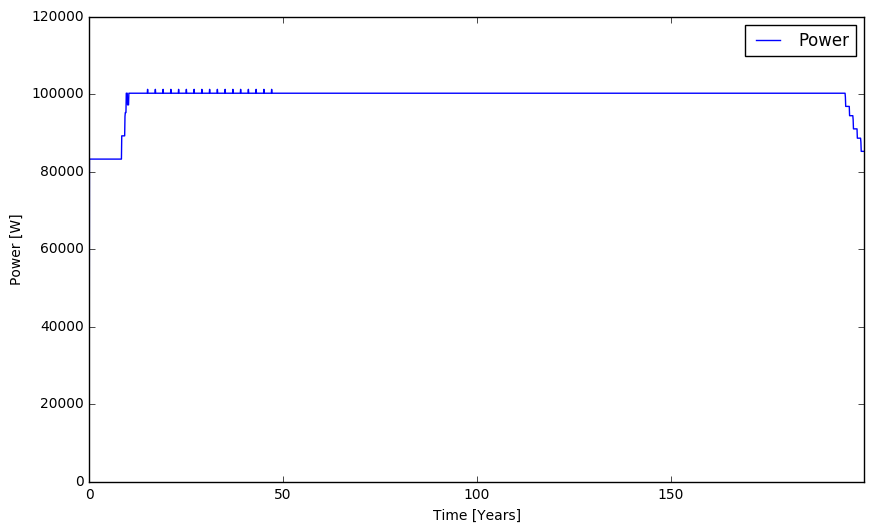

In [11]:
power_dat = pd.DataFrame({'Time': power.Time/12., 'Power': power.Value})



e1x = power_dat.plot(x='Time', y='Power', figsize=(10, 6))




#plt.ylim([0,1000000])
plt.xlabel('Time [Years]')
plt.ylabel('Power [W]')
plt.savefig('power.png', dpi=326)